In [2]:
# Important statistical libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew, probplot
# Some graphing libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Import train dataset into dataframe
train = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/train.csv')
test = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/test.csv')

In [4]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


SalePrice's Skew: 1.8828757597682129; SalePrice's Kurtosis: 6.536281860064529


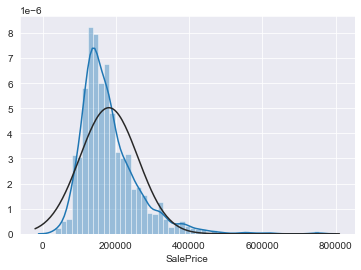

In [5]:
#Exploring Dependent Variables
#Testing the normality of SalePrice
sns.distplot(train.SalePrice,fit=norm)
print(f"SalePrice's Skew: {train.SalePrice.skew()}; SalePrice's Kurtosis: {train.SalePrice.kurt()}")

In [14]:
#Independent Variables-Data Type
#Categorical Variables vs Continuous Variables
#Numerical Variables vs Object Variables
ov = train.columns[train.dtypes == 'object']
nv = train.columns[train.dtypes != 'object']
num_var = pd.DataFrame(nv,columns=['num vars'])
obj_var = pd.DataFrame(ov,columns=['obj vars'])
num_var

,num vars
0,Id
1,MSSubClass
2,LotFrontage
3,LotArea
4,OverallQual
5,OverallCond
6,YearBuilt
7,YearRemodAdd
8,MasVnrArea
9,BsmtFinSF1


In [7]:
#Dividing All Independent Variables into three categories
non_num_vars = [
    'MSZoning', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
    'GarageType', 'MiscFeature', 
    'SaleType', 'SaleCondition'
]
rank_vars = [
    'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'Street', 'Alley',
    'LandSlope', 'Functional', 'GarageFinish', 'MoSold', 'YrSold', 'PavedDrive', 
    'CentralAir', 'LotShape', 'MSSubClass'
]
continuous_vars = [
    'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
]
print(len(train.columns) == len(non_num_vars)+len(rank_vars)+len(continuous_vars)+len(set(['Id','SalePrice'])))

True


In [8]:
#Find Missing Values
data = pd.concat((train,test)).drop(['SalePrice'],axis=1)
missing = data.isnull().sum().sort_values(ascending=False)
missing_pct = missing/data.shape[0]
missing_tb = pd.DataFrame([missing,missing_pct],index=['missing data','missing percentage']).T
missing_tb = missing_tb[missing_tb['missing data']>0]
missing_tb

,missing data,missing percentage
PoolQC,2909.0,0.996574
MiscFeature,2814.0,0.964029
Alley,2721.0,0.932169
Fence,2348.0,0.804385
FireplaceQu,1420.0,0.486468
LotFrontage,486.0,0.166495
GarageCond,159.0,0.054471
GarageQual,159.0,0.054471
GarageYrBlt,159.0,0.054471
GarageFinish,159.0,0.054471


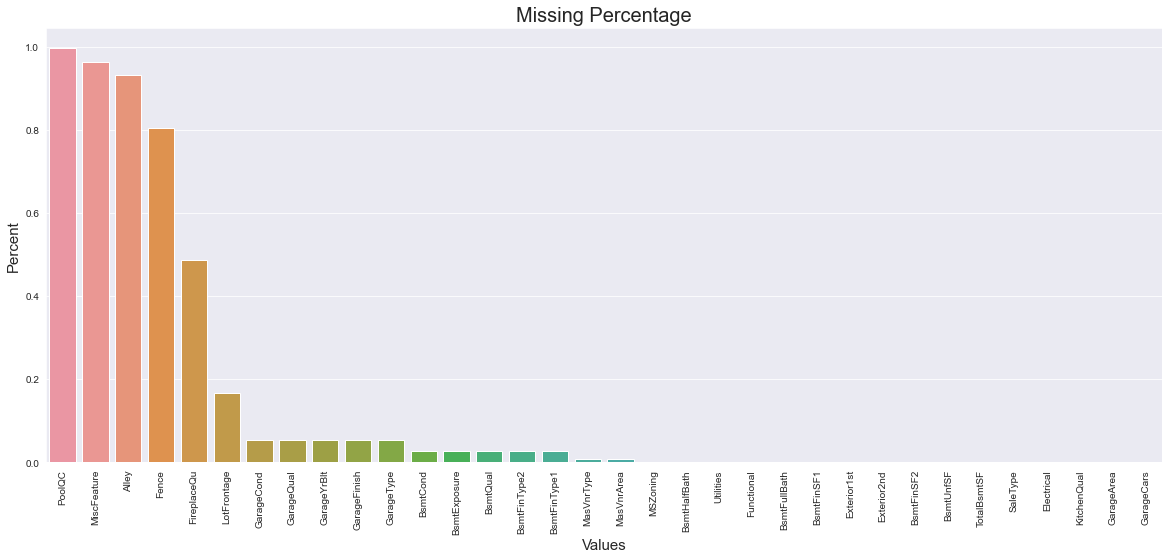

In [11]:
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(x=missing_tb.index,y=missing_tb['missing percentage'])
#sns.set_palette("pastel")
plt.title('Missing Percentage',size=20)
plt.xlabel('Values',size=15)
plt.ylabel('Percent',size=15)
plt.xticks(rotation='90')
plt.show()

/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/robertx/opt/a

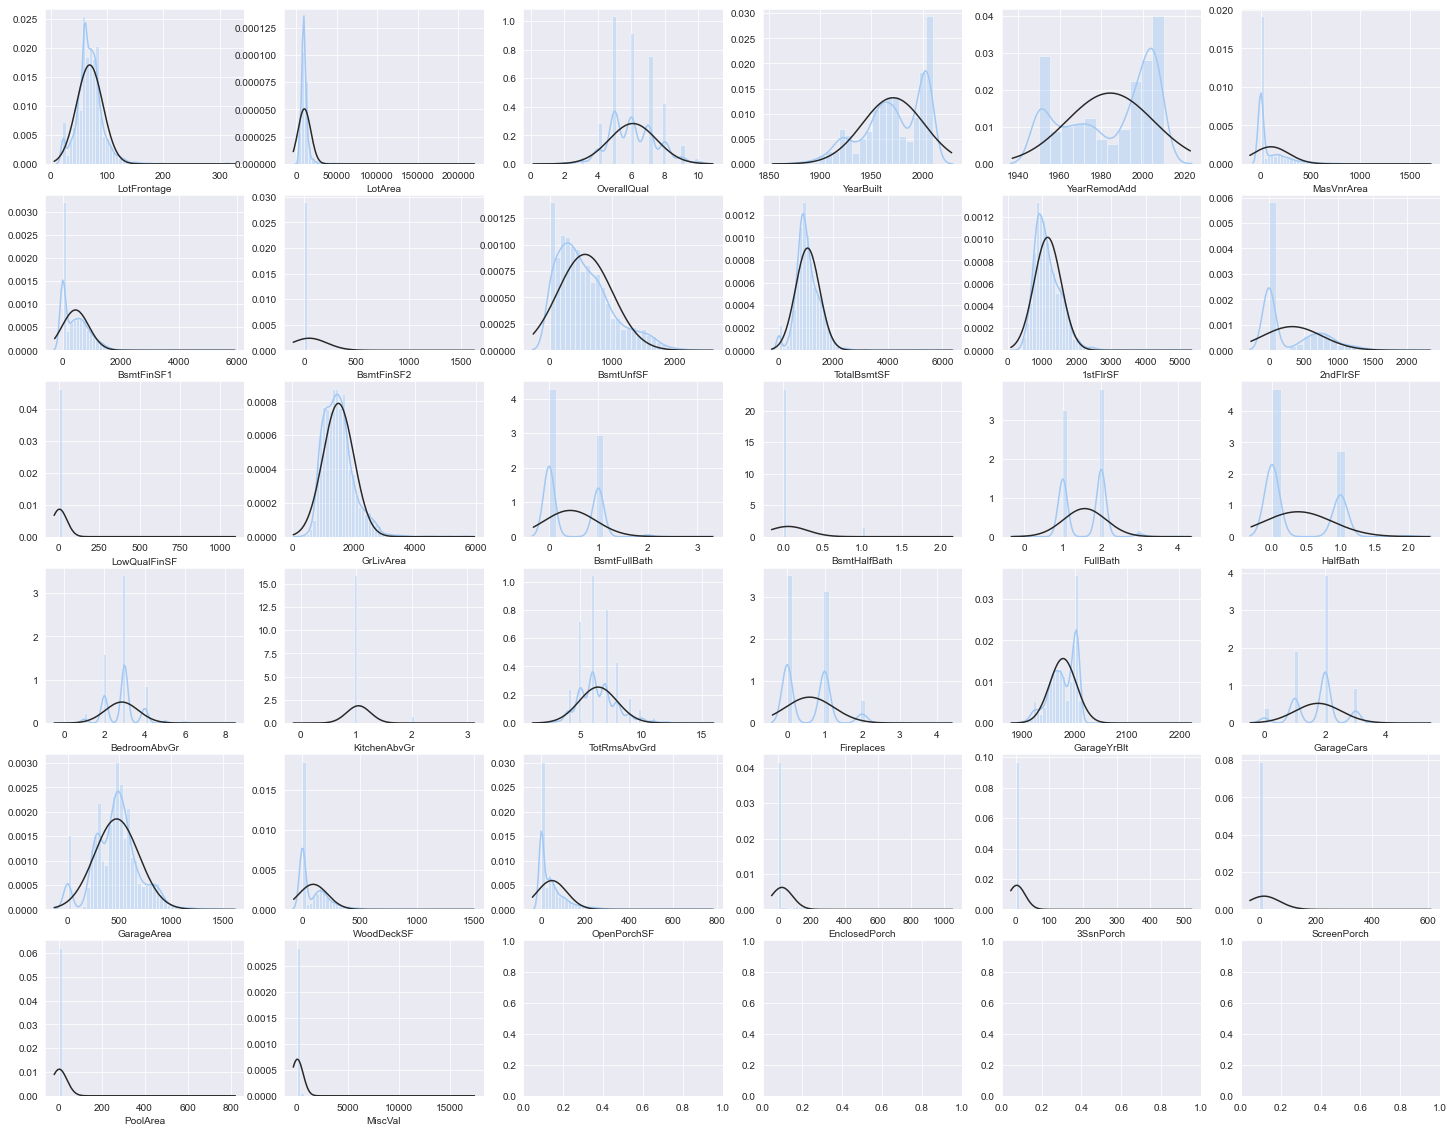

In [13]:
fig, ax = plt.subplots(6,6,figsize=(25,20))
for i,x in enumerate(continuous_vars):
    sns.distplot(data[x],fit=norm,ax=ax[i//6,i%6])